# To obtain graph of employment of Singapore Residents
1. Read relevant rows from csv
1. Replace 'na' and '-'
1. Clean column titles



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#data from https://www.tablebuilder.singstat.gov.sg/publicfacing/createDataTable.action?refId=14554

# dataframe of employment of residents, in thousands
df = pd.read_csv('Employment Age Distribution.csv', skiprows = 4)
df = df.iloc[:228]
df = df.transpose()
df.columns = df.iloc[0]
df = df.iloc[1:-1]
df = df.replace([' na ',' - '],'0')
df.columns = df.columns.str.strip()



1. Have to split into multiple dataframes because each age group have the same column titles
1. Since each age category starts with the column before 'Manufacturing', we find all the indexes of 'Manufacturing' and take that -1 as reference.
1. Split the df based on obtained indexes
1. Append all into a least for ease of manipulation (via iteration)

In [2]:
#obtain index of the start of age category
manu_list = df.columns.get_loc("Manufacturing").tolist()
index_list = []
for i in range (0,len(manu_list)-1):
    if manu_list[i] == True:
        index_list.append(i - 1)
        
print(index_list)

#split df based on obtained index
df_all_res = df.iloc[:,0:19]
df_15_19 = df.iloc[:,19:38]
df_20_24 = df.iloc[:,38:57]
df_25_29 = df.iloc[:,57:76]
df_30_34 = df.iloc[:,76:95]
df_35_39 = df.iloc[:,95:114]
df_40_44 = df.iloc[:,114:133]
df_45_49 = df.iloc[:,133:152]
df_50_54 = df.iloc[:,152:171]
df_55_59 = df.iloc[:,171:190]
df_60_64 = df.iloc[:,190:209]
df_65__ = df.iloc[:,209:]


#combine into a list. #12 items in list
df_list = []
df_list.append(df_all_res)
df_list.append(df_15_19)
df_list.append(df_20_24)
df_list.append(df_25_29)
df_list.append(df_30_34)
df_list.append(df_35_39)
df_list.append(df_40_44)
df_list.append(df_45_49)
df_list.append(df_50_54)
df_list.append(df_55_59)
df_list.append(df_60_64)
df_list.append(df_65__)

[0, 19, 38, 57, 76, 95, 114, 133, 152, 171, 190, 209]


In [3]:
df_list[2].head()

Variables,Employed Residents Aged 20 - 24 Years,Manufacturing,Construction,Services,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Financial & Insurance Services,Business Services,Real Estate Services,Professional Services,Administrative & Support Services,"Community, Social & Personal Services",Public Administration & Education,Health & Social Services,"Arts, Entertainment & Recreation","Other Community, Social & Personal Services",Other Industries Nes
1990,177.6,47.7,6.3,122.8,28.2,10.9,9.1,1.9,10.5,13.7,2.6,6.8,4.3,48.5,38.3,4.4,0,0,0.8
1991,185.5,49.7,6.7,128.7,35.3,12.9,0,0,24.3,0,0,0,0,56.2,0,0,0,0,0.4
1992,178.8,41.9,6.5,129.7,33.8,13.9,0,0,23.5,0,0,0,0,58.5,0,0,0,0,0.7
1993,179.3,39.9,6.6,132.5,34.5,15.2,0,0,23.3,0,0,0,0,59.5,0,0,0,0,0.3
1994,176.5,36.5,6.4,133.3,33.5,14.1,0,0,26.1,0,0,0,0,59.6,0,0,0,0,0.3


1. Create a list of Strings for age ranges. e.g. '15 - 19', '20 - 24'
1. Limit the range of columns to those we need
1. Drop the other columns that we don't need
1. Read header, rename header, update headers
1. Take just the column we want


the following box is where we change the sector we are interested in

In [4]:
age_list = [str(i) + " to " + str((i + 4)) for i in range(15,66,5)]

#handle all df. Select relevant columns and append age to title for identification
for i in range(0,len(df_list)):
    df_list[i] = df_list[i].iloc[:,:4]
    df_list[i].drop(['Construction','Manufacturing'], axis=1, inplace=True)
    
for i in range(1,len(df_list)):
    df_headers = list(df_list[i].columns)
    df_headers = [age_list[i-1] + " " + x for x in df_headers]
    df_list[i].columns = df_headers

for i in range(0,len(df_list)):
    df_list[i] = df_list[i].iloc[:,1:2]
    

C:\Users\tayka\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
df_list[11].head()

,65 to 69 Services
1990,20
1991,14.8
1992,17.2
1993,17.8
1994,20.2


In [6]:
for i in range(0,len(df_list)):
    print(df_list[i].head())

 Variables  Services
 1990         861.2 
 1991         880.1 
 1992         905.6 
 1993         914.3 
 1994         948.6 
       15 to 19 Services
 1990              41.1 
 1991              49.9 
 1992                47 
 1993              40.8 
 1994              35.4 
       20 to 24 Services
 1990             122.8 
 1991             128.7 
 1992             129.7 
 1993             132.5 
 1994             133.3 
       25 to 29 Services
 1990             147.4 
 1991             140.5 
 1992               139 
 1993             131.7 
 1994             140.8 
       30 to 34 Services
 1990               143 
 1991             136.6 
 1992             141.8 
 1993             136.7 
 1994             140.2 
       35 to 39 Services
 1990             119.8 
 1991             119.9 
 1992             123.3 
 1993             127.8 
 1994             138.7 
       40 to 44 Services
 1990              99.8 
 1991             107.8 
 1992             110.2 
 1993             118.4 

1. Join all the df's together into one. Now that we added age range to the titles, they are unique

In [7]:
for i in range(1,len(df_list)):
    df_list[0] = df_list[0].join(df_list[i])

new_df = df_list[0]
new_df.head()


,Services,15 to 19 Services,20 to 24 Services,25 to 29 Services,30 to 34 Services,35 to 39 Services,40 to 44 Services,45 to 49 Services,50 to 54 Services,55 to 59 Services,60 to 64 Services,65 to 69 Services
1990,861.2,41.1,122.8,147.4,143,119.8,99.8,61.1,52.1,33.5,20.7,20
1991,880.1,49.9,128.7,140.5,136.6,119.9,107.8,64.8,60.1,36.7,20.7,14.8
1992,905.6,47,129.7,139,141.8,123.3,110.2,75.2,62.5,37.1,22.7,17.2
1993,914.3,40.8,132.5,131.7,136.7,127.8,118.4,84,62.6,39.6,22.7,17.8
1994,948.6,35.4,133.3,140.8,140.2,138.7,118.6,93.8,63,42.3,22.4,20.2


1. Clean all the data by removing special characters. (except '.' because thats the decimal point)
1. Change to float for computation

In [8]:
#remove special characters and spaces
new_df['Services'] = new_df['Services'].str.strip()
for i in list(new_df.columns):
    new_df[i] = new_df[i].map(lambda x: re.sub("[®'&$’\", \-()]", '', x))
    new_df[i] = new_df[i].apply(np.float)


In [9]:
print(new_df)

        Services  15 to 19 Services  20 to 24 Services  25 to 29 Services  \
 1990      861.2               41.1              122.8              147.4   
 1991      880.1               49.9              128.7              140.5   
 1992      905.6               47.0              129.7              139.0   
 1993      914.3               40.8              132.5              131.7   
 1994      948.6               35.4              133.3              140.8   
 1995      971.9               28.7              127.7              138.5   
 1996     1007.3               33.3              119.2              137.3   
 1997     1031.4               27.6              121.3              148.3   
 1998     1039.1               24.5              105.6              142.7   
 1999     1065.4               27.7              108.4              150.8   
 2000     1089.4               24.3              104.6              159.4   
 2001     1160.6               28.6              114.3              157.8   

1. Get a list of years
1. Reset index so years become an column
1. Get percentage data
    1. Get list of percentage headers ready
    1. Iterate through header and df simultaneously.
    1. Each time create new column with header title and calculate the percentage / total 

In [10]:
years = [i for i in range(1990,2020)]
reset_df = new_df.reset_index()
df_headers = list(reset_df.columns)
df_headers = df_headers[2:]
df_headers_2 = [x + " percentage" for x in df_headers]
for i in range(0,len(df_headers_2)-1):
    reset_df[df_headers_2[i]] = 100 * reset_df[df_headers[i]] / reset_df['Services']

1. Rename index to year

In [20]:
reset_df = reset_df.rename(columns={'index' : 'Year'})
print(reset_df)

      Year  Services  15 to 19 Services  20 to 24 Services  25 to 29 Services  \
0    1990      861.2               41.1              122.8              147.4   
1    1991      880.1               49.9              128.7              140.5   
2    1992      905.6               47.0              129.7              139.0   
3    1993      914.3               40.8              132.5              131.7   
4    1994      948.6               35.4              133.3              140.8   
5    1995      971.9               28.7              127.7              138.5   
6    1996     1007.3               33.3              119.2              137.3   
7    1997     1031.4               27.6              121.3              148.3   
8    1998     1039.1               24.5              105.6              142.7   
9    1999     1065.4               27.7              108.4              150.8   
10   2000     1089.4               24.3              104.6              159.4   
11   2001     1160.6        

1. Plot the Stacked bar chart.

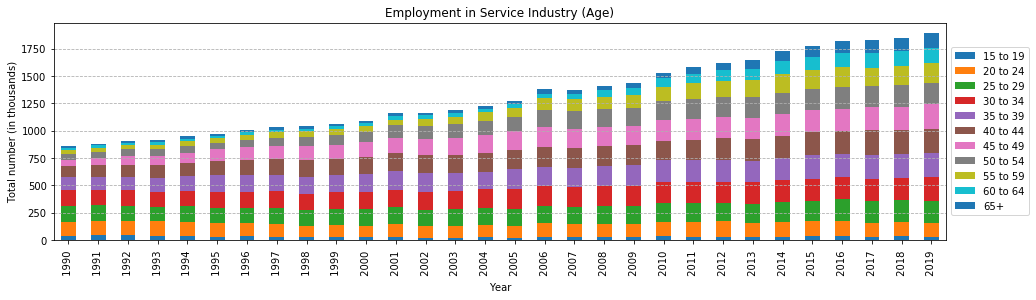

        15 to 19  20 to 24  25 to 29  30 to 34  35 to 39  40 to 44  45 to 49  \
Year                                                                           
 1990       41.1     122.8     147.4     143.0     119.8      99.8      61.1   
 1991       49.9     128.7     140.5     136.6     119.9     107.8      64.8   
 1992       47.0     129.7     139.0     141.8     123.3     110.2      75.2   
 1993       40.8     132.5     131.7     136.7     127.8     118.4      84.0   
 1994       35.4     133.3     140.8     140.2     138.7     118.6      93.8   
 1995       28.7     127.7     138.5     149.0     151.3     129.9     104.6   
 1996       33.3     119.2     137.3     152.9     153.4     138.5     115.5   
 1997       27.6     121.3     148.3     151.2     147.9     144.3     121.9   
 1998       24.5     105.6     142.7     151.6     156.5     153.8     126.8   
 1999       27.7     108.4     150.8     153.3     153.3     149.8     128.2   
 2000       24.3     104.6     159.4    

In [27]:
#this is the line that decides whether we want to plot raw value or percentages be choosing the df.
totalnum_df = reset_df.iloc[:,:13]
#totalnum_df = reset_df.drop(reset_df.columns[range(2,13)], axis = 1)

totalnum_df.drop('Services',axis=1,inplace=True)
totalnum_df = totalnum_df.set_index('Year')

dftotalnum_headers = list(totalnum_df.columns)
dftotalnum_headers = [x.replace(' Services','') for x in dftotalnum_headers]
totalnum_df.columns = dftotalnum_headers
totalnum_df = totalnum_df.rename(columns={'65 to 69':'65+'})
 
fig = plt.figure(figsize=(16,4))
ax_num = fig.add_subplot(111);
totalnum_df.plot(kind='bar', title="Employment in Service Industry (Age)", ax=ax_num, stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax_num.set_ylabel("Total number (in thousands)")
ax_num.set_xlabel("Year")
ax_num.yaxis.grid(linestyle = '--')
plt.show()

fig.savefig('Employment in Service Industry (Age).jpeg')

print(totalnum_df)

In [13]:
print(totalnum_df)

        15 to 19  20 to 24  25 to 29  30 to 34  35 to 39  40 to 44  45 to 49  \
Year                                                                           
 1990       41.1     122.8     147.4     143.0     119.8      99.8      61.1   
 1991       49.9     128.7     140.5     136.6     119.9     107.8      64.8   
 1992       47.0     129.7     139.0     141.8     123.3     110.2      75.2   
 1993       40.8     132.5     131.7     136.7     127.8     118.4      84.0   
 1994       35.4     133.3     140.8     140.2     138.7     118.6      93.8   
 1995       28.7     127.7     138.5     149.0     151.3     129.9     104.6   
 1996       33.3     119.2     137.3     152.9     153.4     138.5     115.5   
 1997       27.6     121.3     148.3     151.2     147.9     144.3     121.9   
 1998       24.5     105.6     142.7     151.6     156.5     153.8     126.8   
 1999       27.7     108.4     150.8     153.3     153.3     149.8     128.2   
 2000       24.3     104.6     159.4    